# Imports

In [56]:
from numpy.random import seed
seed(888)
# Tensorflow import changed from set_random_seed to random.set_seed
from tensorflow import random
random.set_seed(404)

In [166]:
import os
import numpy as np
import tensorflow as tf
import keras
import itertools

from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

from IPython.display import display
from keras.utils import array_to_img
from keras.preprocessing import image
from keras.callbacks import TensorBoard

from time import strftime

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

%matplotlib inline

# Constants

In [138]:
LOG_DIR = 'tensorboard_cifar_logs/'

LABELS_NAMES = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
NR_CLASSES = 10
IMAGE_WIDTH = 32
IMAGE_HEIGHT = 32
IMAGE_PIXELS = IMAGE_WIDTH * IMAGE_HEIGHT
COLOR_CHANNELS = 3
TOTAL_INPUTS = IMAGE_PIXELS * COLOR_CHANNELS

VALIDATION_SIZE = 10000
SMALL_TRAIN_SIZE = 1000

# Get the Data

In [59]:
(x_train_all, y_train_all), (x_test, y_test) = cifar10.load_data()

# Explore the Data

In [60]:
x_train_all[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

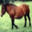

In [61]:
pic = array_to_img(x_train_all[7])
display(pic)

In [62]:
y_train_all.shape

(50000, 1)

In [63]:
y_train_all[7][0]

7

In [64]:
LABELS_NAMES[y_train_all[7][0]]

'Horse'

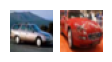

In [65]:
plt.subplot(1, 10, 1)

plt.imshow(x_train_all[4])
plt.tick_params(left= False, bottom=False)
plt.axis('off')
plt.xlabel(LABELS_NAMES[y_train_all[4][0]], fontsize=15)


plt.subplot(1, 10, 2)

plt.imshow(x_train_all[5])
plt.tick_params(left= False, bottom=False)
plt.axis('off')
plt.xlabel(LABELS_NAMES[y_train_all[5][0]], fontsize=15)
plt.show()

**Challenge:** Creating a for loop to display the first 10 images from the x_train_all array in a row. Show the name of the label below the picture. Remove tick marks. Use Matplotlib

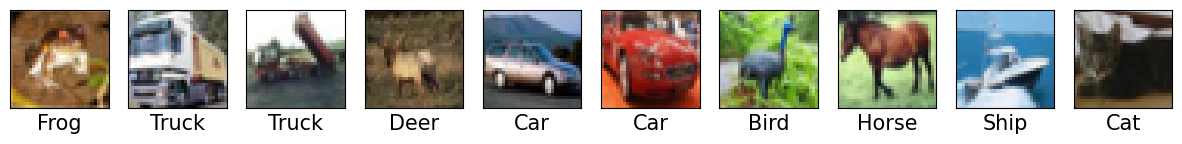

In [66]:
plt.figure(figsize=(15, 5))

for i in range(10):
    plt.subplot(1, 10, i+1)

    plt.yticks([])
    plt.xticks([])
    plt.xlabel(LABELS_NAMES[y_train_all[i][0]], fontsize=15)
    plt.imshow(x_train_all[i])
    

plt.show()

In [67]:
x_train_all[0].shape

(32, 32, 3)

In [68]:
nr_images, x, y, c = x_train_all.shape
print(f'images = {nr_images} \t| width = {x} \t| height = {y} \t| channels = {c}')

images = 50000 	| width = 32 	| height = 32 	| channels = 3


In [69]:
x_test.shape

(10000, 32, 32, 3)

# Preprocess Data

In [70]:
type(x_train_all[0][0][0][0])

numpy.uint8

In [71]:
# Scalating the array values to 255 to conver them to values between 0 and 1 which later will help to adjust weights 
# for gradient descent algorithms. 255 corresponds to the values that R G B colors can be set to.
x_train_all, x_test = x_train_all / 255, x_test / 255

In [72]:
type(x_train_all[0][0][0][0])

numpy.float64

In [73]:
# Reshaping the x_train_all to reduce dimensions from 4 to 1
x_train_all = x_train_all.reshape(x_train_all.shape[0], TOTAL_INPUTS)

In [74]:
x_train_all.shape

(50000, 3072)

In [75]:
x_test = x_test.reshape(len(x_test), TOTAL_INPUTS)
print(f'Shape of x_test is {x_test.shape}')

Shape of x_test is (10000, 3072)


# Create Validation Dataset

In [76]:
x_val = x_train_all[:VALIDATION_SIZE]
y_val = y_train_all[:VALIDATION_SIZE]

x_val.shape

(10000, 3072)

**Challenge:** Creating two Numpy arrays x_train, y_train that have the shape (40000, 3072) and (40000, 1) respectively. They need to contain the last 40000 values from x_train_all and y_train_all respectively.

In [77]:
x_train = x_train_all[VALIDATION_SIZE:]
y_train = y_train_all[VALIDATION_SIZE:]

# Create a small dataset (for illustration)

In [78]:
x_train_xs = x_train[:SMALL_TRAIN_SIZE]
y_train_xs = y_train[:SMALL_TRAIN_SIZE]

# Define the Neural Network using Keras

In [101]:
model_1 = Sequential([
    Dense(units=128, input_dim=TOTAL_INPUTS, activation='relu', name='m1_hidden1'),
    Dense(units=64, activation='relu', name='m1_hidden2'),
    Dense(units=32, activation='relu', name='m1_hidden3'),
    Dense(units=10, activation='softmax', name='m1_output')
])

# Compiling the model
model_1.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

In [102]:
# Setting our second Neural Network with alternative commands
model_2 = Sequential()
model_2.add(Dropout(0.2, seed=42, input_shape=(TOTAL_INPUTS,)))
model_2.add(Dense(128, activation='relu', name='m2_hidden1'))
model_2.add(Dense(64, activation='relu', name='m2_hidden2'))
model_2.add(Dense(32, activation='relu', name='m2_hidden3'))
model_2.add(Dense(10, activation='softmax', name='m2_output'))

model_2.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

**Challenge:** Creating a third model: model_ that has two Dropout layers. The second Dropout layer should be added after the first hidden layer and have a dropout rate of 25%

In [106]:
# Setting a third Neural Network model 
model_3 = Sequential()
model_3.add(Dropout(0.2, seed=42, input_shape=(TOTAL_INPUTS,)))
model_3.add(Dense(128, activation='relu', name='m3_hidden1'))
model_3.add(Dropout(0.25, seed=42))
model_3.add(Dense(64, activation='relu', name='m3_hidden2'))
model_3.add(Dense(32, activation='relu', name='m3_hidden3'))
model_3.add(Dense(10, activation='softmax', name='m3_output'))

model_3.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

In [80]:
type(model_1)

keras.engine.sequential.Sequential

In [81]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 m1_hidden1 (Dense)          (None, 128)               393344    
                                                                 
 m1_hidden2 (Dense)          (None, 64)                8256      
                                                                 
 m1_hidden3 (Dense)          (None, 32)                2080      
                                                                 
 m1_output (Dense)           (None, 10)                330       
                                                                 
Total params: 404,010
Trainable params: 404,010
Non-trainable params: 0
_________________________________________________________________


# Tensorboard (Visualising Learning)

In [39]:
#def get_tensorboard(model_name):
#    
#    folder_name = f'{model_name} at {strftime("%H %M")}' 
#    dir_paths = os.path.join(LOG_DIR, folder_name)
#
#    try:
#        os.makedirs(dir_paths)
#    except OSError as err:
#        print(err.strerror)
#    else:
#        print('Succesfully created directory')
#
#    return TensorBoard(log_dir=dir_paths)

In [82]:
def get_tensorboard(model_name):
 
    folder_name = f'{model_name} at {strftime("%H %M")}'
    log_dir = os.path.join(LOG_DIR, folder_name)
 
    try:
        os.makedirs(dir_paths)
    except OSError as err:
        print(err.strerror)
    else:
        print('Successfully created directory')
 
    return    tf.keras.callbacks.TensorBoard(log_dir, profile_batch = 100000000)

# Fit the Model

In [85]:
samples_per_batch = 1000

In [93]:
# %%time
# 
# nr_epochs = 150
# model_1.fit(x_train_xs, y_train_xs, batch_size=samples_per_batch, epochs=nr_epochs,
#             callbacks=[get_tensorboard('Model 1')], verbose=0, validation_data=(x_val, y_val))

File exists


2023-08-09 00:56:34.543605: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2023-08-09 00:56:34.543898: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.
2023-08-09 00:56:34.547133: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.


CPU times: user 1min 41s, sys: 19.3 s, total: 2min 1s
Wall time: 1min 28s


In [100]:
# %%time
# # MODEL 2
# nr_epochs = 150
# model_2.fit(x_train_xs, y_train_xs, batch_size=samples_per_batch, epochs=nr_epochs,
#             callbacks=[get_tensorboard('Model 2')], verbose=0, validation_data=(x_val, y_val))

File exists


2023-08-09 22:37:22.334385: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2023-08-09 22:37:22.336259: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.
2023-08-09 22:37:22.353774: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.


CPU times: user 1min 47s, sys: 19.1 s, total: 2min 6s
Wall time: 1min 12s


In [103]:
%%time
# MODEL 1 XL

nr_epochs = 100
model_1.fit(x_train, y_train, batch_size=samples_per_batch, epochs=nr_epochs,
            callbacks=[get_tensorboard('Model 1 XL')], verbose=0, validation_data=(x_val, y_val))

Successfully created directory


2023-08-10 00:09:03.340217: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2023-08-10 00:09:03.346349: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.
2023-08-10 00:09:03.388629: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.


CPU times: user 8min 10s, sys: 1min 11s, total: 9min 22s
Wall time: 5min 35s


In [104]:
%%time
# MODEL 2 XL

nr_epochs = 100
model_2.fit(x_train, y_train, batch_size=samples_per_batch, epochs=nr_epochs,
            callbacks=[get_tensorboard('Model 2 XL')], verbose=0, validation_data=(x_val, y_val))

File exists


2023-08-10 00:14:37.589578: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2023-08-10 00:14:37.590502: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.
2023-08-10 00:14:37.596583: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.


CPU times: user 11min 23s, sys: 1min 28s, total: 12min 51s
Wall time: 5min 31s


In [107]:
%%time
# MODEL 3 XL

nr_epochs = 100
model_3.fit(x_train, y_train, batch_size=samples_per_batch, epochs=nr_epochs,
            callbacks=[get_tensorboard('Model 3 XL')], verbose=0, validation_data=(x_val, y_val))

File exists


2023-08-10 00:53:38.400232: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2023-08-10 00:53:38.401567: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.
2023-08-10 00:53:38.409867: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.


CPU times: user 11min 45s, sys: 1min 44s, total: 13min 29s
Wall time: 8min 2s


# Predictions on Individual Images

In [108]:
x_val[0].shape

(3072,)

In [109]:
test = np.expand_dims(x_val[0], axis=0)
test.shape

(1, 3072)

In [112]:
np.set_printoptions(precision=3)

In [113]:
model_2.predict(test)

1/1 [==============================] - 0s 78ms/step


array([[0.031, 0.02 , 0.024, 0.173, 0.089, 0.113, 0.464, 0.08 , 0.001,
        0.004]], dtype=float32)

In [115]:
model_2.predict(x_val).shape

313/313 [==============================] - 1s 4ms/step


(10000, 10)

In [119]:
# model_2.predict_classes(test) deprecated method
predict_x=model_2.predict(test) 
classes_x=np.argmax(predict_x, axis=1)

classes_x

1/1 [==============================] - 0s 45ms/step


array([6])

In [120]:
y_val[0]

array([6], dtype=uint8)

**Challenge:** Writing a for loop to print out the actual value and the predicted value for the first 10 images in the validation dataset

In [122]:
actual_values = []
predicted_values = []

for i in range(10):  
    test_img = np.expand_dims(x_val[i], axis=0)
    predict_x=model_2.predict(test_img)
    predicted_val=np.argmax(predict_x, axis=1)
    print(f'Actual Value: {y_val[i][0]} vs. Predicted Value: {predicted_val}')  

1/1 [==============================] - 0s 302ms/step
Actual Value: 6 vs. Predicted Value: [6]
1/1 [==============================] - 0s 53ms/step
Actual Value: 9 vs. Predicted Value: [1]
1/1 [==============================] - 0s 75ms/step
Actual Value: 9 vs. Predicted Value: [9]
1/1 [==============================] - 0s 62ms/step
Actual Value: 4 vs. Predicted Value: [4]
1/1 [==============================] - 0s 82ms/step
Actual Value: 1 vs. Predicted Value: [1]
1/1 [==============================] - 0s 74ms/step
Actual Value: 1 vs. Predicted Value: [9]
1/1 [==============================] - 0s 49ms/step
Actual Value: 2 vs. Predicted Value: [2]
1/1 [==============================] - 0s 79ms/step
Actual Value: 7 vs. Predicted Value: [7]
1/1 [==============================] - 0s 95ms/step
Actual Value: 8 vs. Predicted Value: [8]
1/1 [==============================] - 0s 41ms/step
Actual Value: 3 vs. Predicted Value: [9]


# Evaluation

In [123]:
model_2.metrics_names

['loss', 'accuracy']

In [125]:
test_loss, test_accuracy = model_2.evaluate(x_test, y_test)
print(f'Test loss is {test_loss:0.3} and Test Accuracy is {test_accuracy:0.1%}')

313/313 [==============================] - 3s 8ms/step - loss: 1.4388 - accuracy: 0.4940
Test loss is 1.44 and Test Accuracy is 49.4%


### Confusion Matrix

In [129]:
predictions = model_2.predict(x_test) 
classes_predictions = np.argmax(predictions, axis=1)

conf_matrix = confusion_matrix(y_true=y_test, y_pred=classes_predictions)

313/313 [==============================] - 2s 4ms/step


In [159]:
conf_matrix.shape

(10, 10)

In [169]:
nr_rows = conf_matrix.shape[0]
nr_cols = conf_matrix.shape[1]

In [161]:
conf_matrix.max()

629

In [162]:
conf_matrix.min()

6

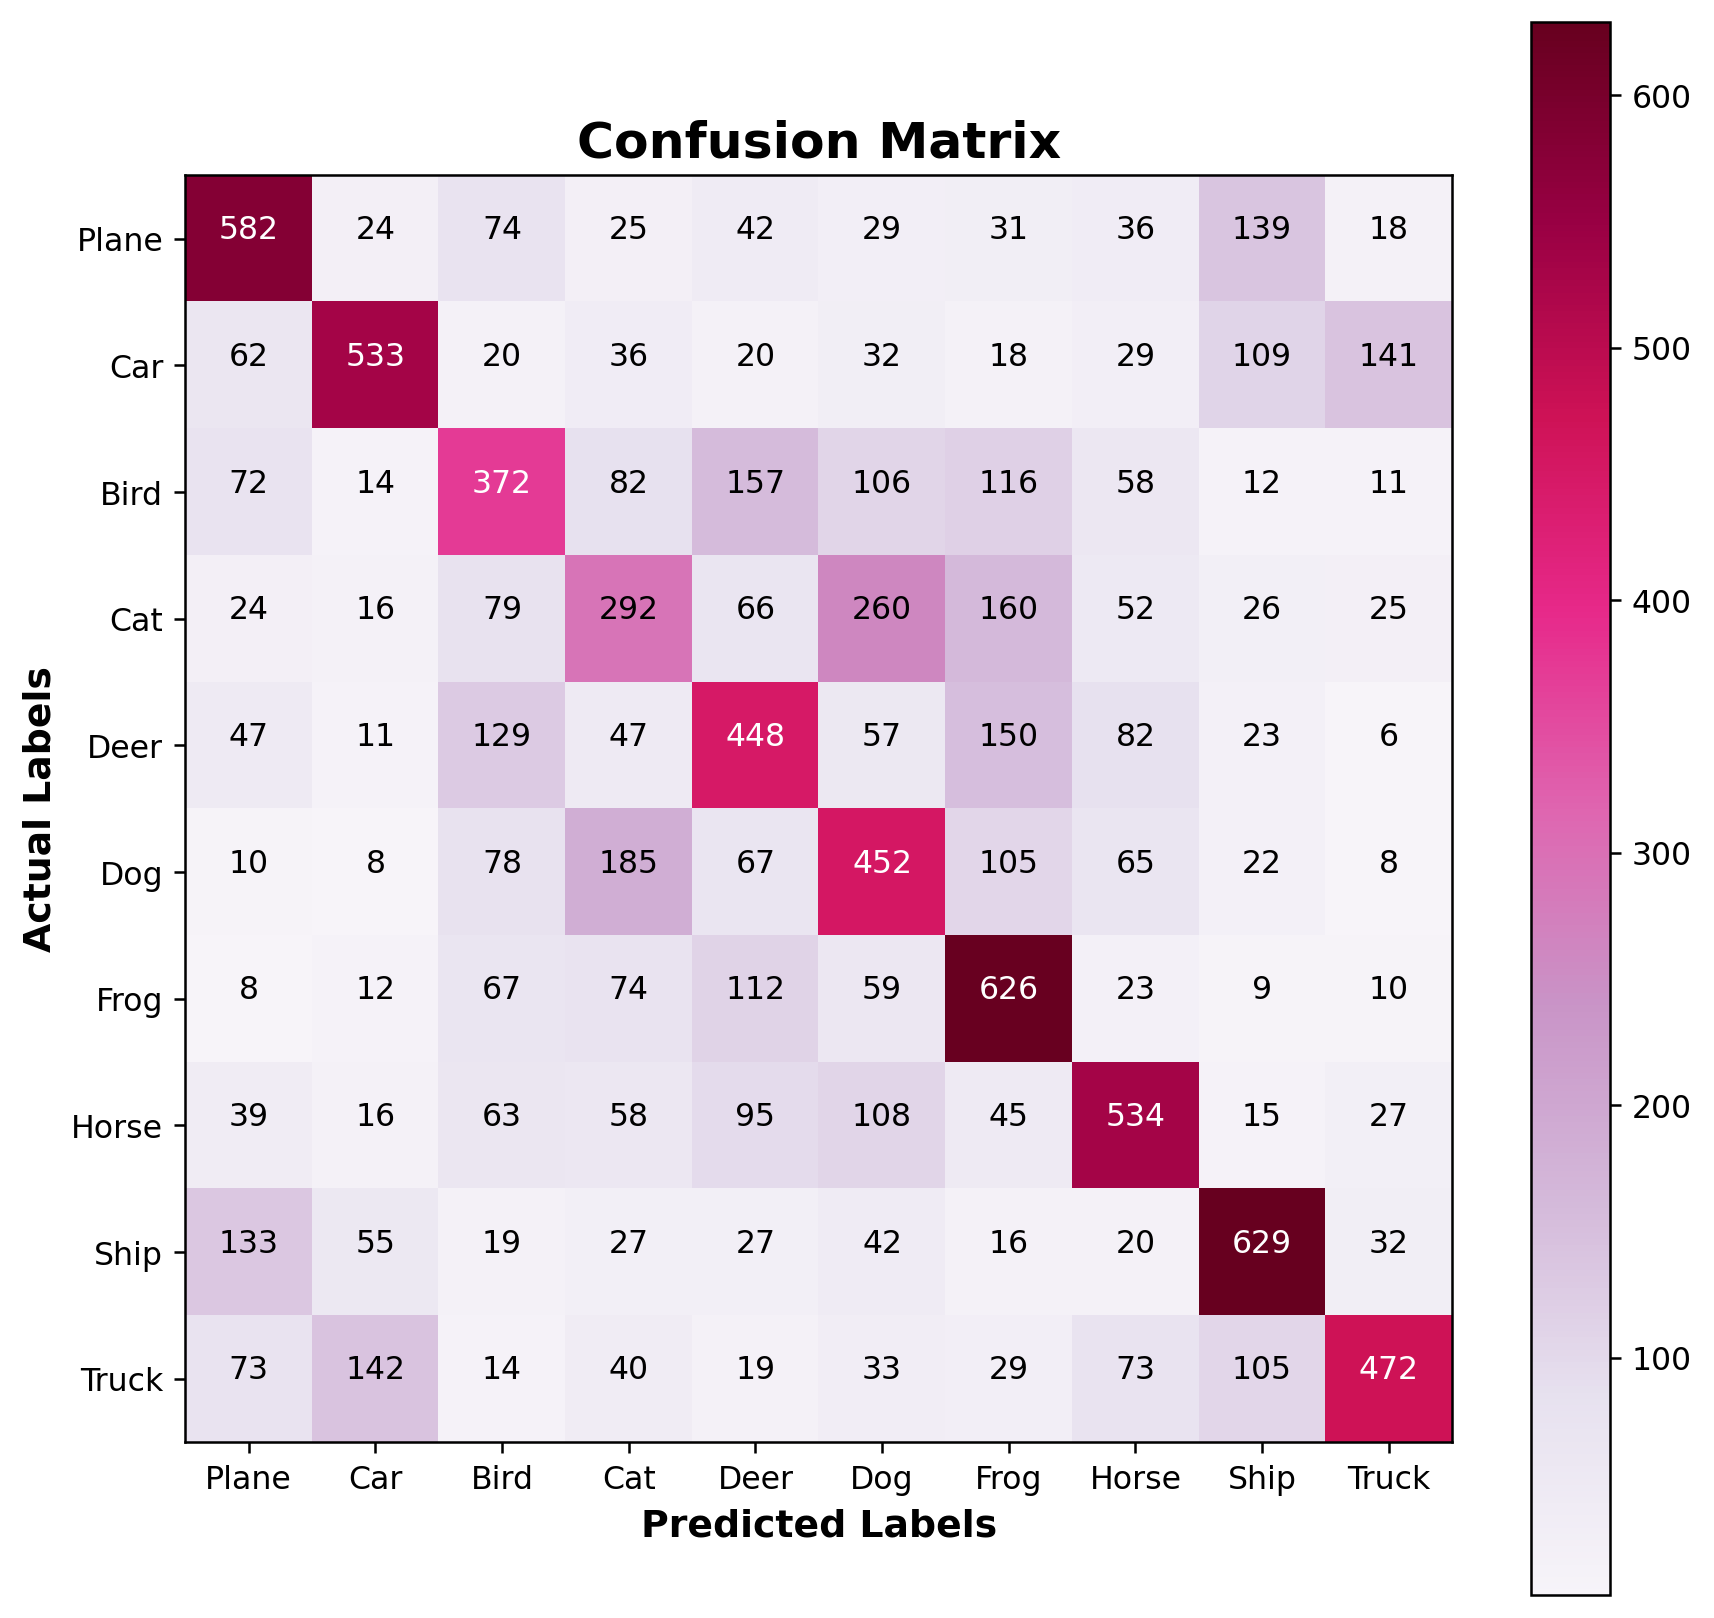

In [182]:
plt.figure(figsize=(9,9), dpi=227)
plt.imshow(conf_matrix, cmap=plt.cm.PuRd)

plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.ylabel('Actual Labels', fontsize=12, fontweight='bold')
plt.xlabel('Predicted Labels', fontsize=12, fontweight='bold')

tick_marks = np.arange(NR_CLASSES)
plt.yticks(tick_marks, LABELS_NAMES)
plt.xticks(tick_marks, LABELS_NAMES)

plt.colorbar()

for i, j in itertools.product(range(nr_rows), range(nr_cols)):
    plt.text(j, i, conf_matrix[i, j], horizontalalignment='center',
            color='white' if conf_matrix[i, j] > conf_matrix.max()/2 else 'black')

plt.show()

In the confusion matritx **true positives** values are represented by the diagonal that cuts in half the matrix
the **false positives** are located under this diagonal and **false negatives** over it

In [183]:
# True positives:
np.diag(conf_matrix)

array([582, 533, 372, 292, 448, 452, 626, 534, 629, 472])

In [184]:
recall = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
recall

array([0.582, 0.533, 0.372, 0.292, 0.448, 0.452, 0.626, 0.534, 0.629,
       0.472])

In [185]:
precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)
precision

array([0.554, 0.641, 0.407, 0.337, 0.425, 0.384, 0.483, 0.549, 0.578,
       0.629])

In [187]:
avg_recall = np.mean(recall)
print(f'Model 2 recall score is: {avg_recall:.2%}')

Model 2 recall score is: 49.40%


**Challenge:** Calculating & printing the average precision for the whole model. Calculating f-score for the model as a whole 

In [188]:
avg_precision = np.mean(precision)
print(f'Model 2 precision score is: {avg_precision:.2%}')

Model 2 precision score is: 49.88%


In [190]:
f1_score = 2 * (avg_precision * avg_recall) / (avg_precision + avg_recall)
print(f'F-Score for the whole model is: {f1_score:.2%}')

F-Score for the whole model is: 49.64%
